# Construction

$$
\newcommand{\sumN}{\sum_{n = 1}^N} 
\newcommand{\sumn}{\sum_n} 
\newcommand{\bx}{\mathbf{x}} 
\newcommand{\bbeta}{\boldsymbol{\beta}} 
\newcommand{\btheta}{\boldsymbol{\theta}} 
\newcommand{\bbetahat}{\boldsymbol{\hat{\beta}}} 
\newcommand{\bthetahat}{\boldsymbol{\hat{\theta}}} 
\newcommand{\dadb}[2]{\frac{\partial #1}{\partial #2}} 
\newcommand{\by}{\mathbf{y}} 
\newcommand{\bX}{\mathbf{X}}
$$

This section demonstrates how to construct a linear regression model using only `numpy`. To do this, we generate a class named `LinearRegression`. We use this class to train the model and make future predictions. 

The first method in the `LinearRegression` class is `fit()`, which takes care of estimating the $\bbeta$ parameters. This simply consists of calculating 

$$
\bbetahat = \left(\bX^\top \bX\right)^{-1}\bX^\top \by
$$

The `fit` method also makes in-sample predictions with $\hat{\by} = \bX \bbetahat$ and calculates the training loss with 

$$
\mathcal{L}(\bbetahat) = \frac{1}{2}\sumN \left(y_n - \hat{y}_n \right)^2.
$$

The second method is `predict()`, which forms out-of-sample predictions. Given a test set of predictors $\bX'$, we can form fitted values with $\hat{\by}' = \bX' \bbetahat$.

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
class LinearRegression:

    def fit(self, X, y, intercept = False):

        # record data and dimensions
        if intercept == False: # add intercept (if not already included)
            ones = np.ones(len(X)).reshape(len(X), 1) # column of ones 
            X = np.concatenate((ones, X), axis = 1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        
        # estimate parameters
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        
        # make in-sample predictions
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        # calculate loss
        self.L = .5*np.sum((self.y - self.y_hat)**2)
        
    def predict(self, X_test, intercept = True):
        
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)


Let's try out our `LinearRegression` class with some data. Here we use the {doc}`Boston housing </content/appendix/data>` dataset from `sklearn.datasets`. The target variable in this dataset is median neighborhood home value. The predictors are all continuous and represent factors possibly related to the median home value, such as average rooms per house. Hit "Click to show" to see the code that loads this data.

In [27]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston['data']
y = boston['target']


With the class built and the data loaded, we are ready to run our regression model. This is as simple as instantiating the model and applying `fit()`, as shown below. 

In [28]:
model = LinearRegression() # instantiate model
model.fit(X, y, intercept = False) # fit model

Let's then see how well our fitted values model the true target values. The closer the points lie to the 45-degree line, the more accurate the fit. The model seems to do reasonably well; our predictions definitely follow the true values quite well, although we would like the fit to be a bit tighter. 

```{note}
Note the handful of observations with $y = 50$ exactly. This is due to censorship in the data collection process. It appears neighborhoods with average home values above \$50,000 were assigned a value of 50 even.
```

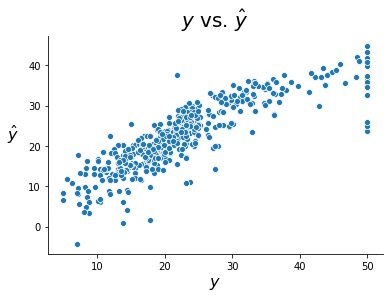

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()